# code to read data and put into pandas

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
os.getcwd()

'/Users/geri/Documents/tisem/thesis/data/SPF_individual_forecasts'

In [3]:
#read the excel file with dates for the forecasts
dates = pd.read_excel('SPF_rounds_dates.xlsx')
new_header = dates.iloc[0] 
dates = dates[1:] 
dates.columns = new_header
dates = dates.dropna()

In [4]:
dates['Deadline to reply'].unique()

array([datetime.datetime(1999, 2, 12, 0, 0),
       datetime.datetime(1999, 5, 3, 0, 0),
       datetime.datetime(1999, 8, 6, 0, 0),
       datetime.datetime(1999, 11, 3, 0, 0),
       datetime.datetime(2000, 2, 9, 0, 0),
       datetime.datetime(2000, 5, 5, 0, 0),
       datetime.datetime(2000, 8, 4, 0, 0),
       datetime.datetime(2000, 11, 2, 0, 0),
       datetime.datetime(2001, 2, 1, 0, 0),
       datetime.datetime(2001, 5, 3, 0, 0),
       datetime.datetime(2001, 8, 3, 0, 0),
       datetime.datetime(2001, 10, 29, 0, 0),
       datetime.datetime(2002, 2, 4, 0, 0),
       datetime.datetime(2002, 4, 22, 0, 0),
       datetime.datetime(2002, 7, 22, 0, 0),
       datetime.datetime(2002, 10, 23, 0, 0),
       datetime.datetime(2003, 1, 27, 0, 0),
       datetime.datetime(2003, 4, 24, 0, 0),
       datetime.datetime(2003, 7, 23, 0, 0),
       datetime.datetime(2003, 10, 28, 0, 0),
       datetime.datetime(2004, 1, 28, 0, 0),
       datetime.datetime(2004, 4, 26, 0, 0),
       datetime.

In [6]:
##initiate df for the forecats
##create new dataframe
df = pd.DataFrame(columns=['SurveyDate', 'Source','Current Year', 'One Year Ahead', 'Two Years Ahead','Rolling1', 'Rolling2', 'Longer Term'])
df['SurveyDate'] = dates['Deadline to reply'].repeat(128)
for each_date in dates['Deadline to reply'].unique():
    df.loc[df.SurveyDate == each_date,'Source'] = list(range(1,129))
#sources = pd.Series(list(range(1,129))).repeat(len(dates['Deadline to reply'].tolist()))
#sources.index = df.index
#df['Source'] = sources
dqs = {'Q1':'Dec',
      'Q2':'Mar',
      'Q3':'Jun',
      'Q4':'Sep'}
df

,SurveyDate,Source,Current Year,One Year Ahead,Two Years Ahead,Rolling1,Rolling2,Longer Term
3,1999-02-12,1,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-02-12,2,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-02-12,3,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-02-12,4,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-02-12,5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
87,2020-01-13,124,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-13,125,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-13,126,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-13,127,NaN,NaN,NaN,NaN,NaN,NaN


# inflation

In [7]:
for curr_forecast in dates['Deadline to reply'].tolist():
    print(curr_forecast)
    date_curr =  dates.loc[dates['Deadline to reply']==curr_forecast]['SPF round'].to_string().rsplit(' ', 1)[1]
    curr_csv = date_curr+".csv"
    currq = date_curr[-2:]
    df_curr = pd.read_csv(curr_csv)
    #df_curr['INFLATION EXPECTATIONS; YEAR-ON-YEAR CHANGE IN HICP'].unique()
    index_changes = df_curr.loc[df_curr['INFLATION EXPECTATIONS; YEAR-ON-YEAR CHANGE IN HICP'].isnull()].index
    df_infl = df_curr.loc[0:index_changes[0]-1,:]
    new_header = df_infl.iloc[0] #grab the first row for the header
    df_infl = df_infl[1:] #take the data less the header row
    df_infl.columns = new_header #set the header row as the df header
    df_infl.dropna(subset=['POINT'])
    df_infl.dropna(axis='columns', how='all')
    df_infl_point = df_infl[['TARGET_PERIOD', 'FCT_SOURCE', 'POINT']]
    #horizons = df_infl_point["TARGET_PERIOD"].unique()
    #if len(horizons)==6:
    #    horizons = horizons[[0, 2, 4]]
    sources_list = np.array(df_infl_point['FCT_SOURCE'].unique().astype(int))
    t1 = str(curr_forecast.year)
    t2 = str(curr_forecast.year+1)
    t6 = str(curr_forecast.year+2)    
    if (currq=='Q1' or currq=='Q2'):
        t3 = str(curr_forecast.year+4)
    else:
        t3 = str(curr_forecast.year+5)
    if (currq=='Q1'):
        t4 = str(curr_forecast.year)+dqs[currq]
        t5 = str(curr_forecast.year+1)+dqs[currq]
    else:
        t4 = str(curr_forecast.year+1)+dqs[currq]
        t5 = str(curr_forecast.year+2)+dqs[currq]
#sources_list
    for each_source in sources_list:
        df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Current Year"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t1) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"One Year Ahead"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t2) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        if len(df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t6)]) > 0:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Two Years Ahead"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t6) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values 
        if df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t3)].empty:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Longer Term"] = np.nan
        else:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Longer Term"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t3) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Rolling1"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t4) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        if df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t5)].empty:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Rolling2"] = np.nan
        else:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Rolling2"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t5) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        

1999-02-12 00:00:00
1999-05-03 00:00:00
1999-08-06 00:00:00
1999-11-03 00:00:00
2000-02-09 00:00:00
2000-05-05 00:00:00
2000-08-04 00:00:00
2000-11-02 00:00:00
2001-02-01 00:00:00
2001-05-03 00:00:00
2001-08-03 00:00:00
2001-10-29 00:00:00
2002-02-04 00:00:00
2002-04-22 00:00:00
2002-07-22 00:00:00
2002-10-23 00:00:00
2003-01-27 00:00:00
2003-04-24 00:00:00
2003-07-23 00:00:00
2003-10-28 00:00:00
2004-01-28 00:00:00
2004-04-26 00:00:00
2004-07-26 00:00:00
2004-10-21 00:00:00
2005-01-26 00:00:00
2005-04-22 00:00:00
2005-07-22 00:00:00
2005-10-24 00:00:00
2006-01-23 00:00:00
2006-04-26 00:00:00
2006-07-21 00:00:00
2006-10-20 00:00:00
2007-01-24 00:00:00
2007-04-23 00:00:00
2007-07-18 00:00:00
2007-10-18 00:00:00
2008-01-18 00:00:00
2008-04-18 00:00:00
2008-07-18 00:00:00
2008-10-17 00:00:00
2009-01-20 00:00:00
2009-04-20 00:00:00
2009-07-17 00:00:00
2009-10-19 00:00:00
2010-01-19 00:00:00
2010-04-20 00:00:00
2010-07-19 00:00:00
2010-10-19 00:00:00
2011-01-18 00:00:00
2011-04-19 00:00:00


In [8]:
df

,SurveyDate,Source,Current Year,One Year Ahead,Two Years Ahead,Rolling1,Rolling2,Longer Term
3,1999-02-12,1,1,1.5,NaN,1.2,1.7,1.8
3,1999-02-12,2,1,1.2,NaN,1.2,1.2,1.6
3,1999-02-12,3,.8,1,NaN,.8,1.2,1.7
3,1999-02-12,4,1.2,1.6,NaN,1.3,1.8,2
3,1999-02-12,5,.8,1.4,NaN,1.1,1.5,1.8
...,...,...,...,...,...,...,...,...
87,2020-01-13,124,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-13,125,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-13,126,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-13,127,1.4,1.6,1.8,1.5,1.7,1.8


In [9]:
import pickle as pk
df_infl = df.copy()
df_infl.to_pickle('infldf.pkl')

# GDP

In [34]:
##initiate df for the forecats
##create new dataframe
df = pd.DataFrame(columns=['SurveyDate', 'Source','Current Year', 'One Year Ahead', 'Two Years Ahead','Rolling1', 'Rolling2', 'Longer Term'])
df['SurveyDate'] = dates['Deadline to reply'].repeat(128)
for each_date in dates['Deadline to reply'].unique():
    df.loc[df.SurveyDate == each_date,'Source'] = list(range(1,129))
#sources = pd.Series(list(range(1,129))).repeat(len(dates['Deadline to reply'].tolist()))
#sources.index = df.index
#df['Source'] = sources
dqs = {'Q1':'Q3',
      'Q2':'Q4',
      'Q3':'Q1',
      'Q4':'Q2'}
df

,SurveyDate,Source,Current Year,One Year Ahead,Two Years Ahead,Rolling1,Rolling2,Longer Term
3,1999-02-12,1,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-02-12,2,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-02-12,3,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-02-12,4,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-02-12,5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
87,2020-01-13,124,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-13,125,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-13,126,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-13,127,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
for curr_forecast in dates['Deadline to reply'].tolist():
    print(curr_forecast)
    date_curr =  dates.loc[dates['Deadline to reply']==curr_forecast]['SPF round'].to_string().rsplit(' ', 1)[1]
    curr_csv = date_curr+".csv"
    currq = date_curr[-2:]
    df_curr = pd.read_csv(curr_csv)
    #df_curr['INFLATION EXPECTATIONS; YEAR-ON-YEAR CHANGE IN HICP'].unique()
    index_changes = df_curr.loc[df_curr['INFLATION EXPECTATIONS; YEAR-ON-YEAR CHANGE IN HICP'].isnull()].index
    if len(index_changes)==4:
        df_infl = df_curr.loc[index_changes[1]+1:index_changes[2]-1,:]
    else:
        df_infl = df_curr.loc[index_changes[2]+1:index_changes[3]-1,:]
    new_header = df_infl.iloc[1] #grab the first row for the header
    df_infl = df_infl[2:] #take the data less the header row
    df_infl.columns = new_header #set the header row as the df header
    df_infl.dropna(subset=['POINT'])
    df_infl.dropna(axis='columns', how='all')
    df_infl_point = df_infl[['TARGET_PERIOD', 'FCT_SOURCE', 'POINT']]
    #horizons = df_infl_point["TARGET_PERIOD"].unique()
    #if len(horizons)==6:
    #    horizons = horizons[[0, 2, 4]]
    sources_list = np.array(df_infl_point['FCT_SOURCE'].unique().astype(int))
    t1 = str(curr_forecast.year)
    t2 = str(curr_forecast.year+1)
    t6 = str(curr_forecast.year+2)
    if (currq=='Q1' or currq=='Q2'):
        t3 = str(curr_forecast.year+4)
    else:
        t3 = str(curr_forecast.year+5)
    if (currq=='Q1' or currq=='Q2'):
        t4 = str(curr_forecast.year)+dqs[currq]
        t5 = str(curr_forecast.year+1)+dqs[currq]
    else:
        t4 = str(curr_forecast.year+1)+dqs[currq]
        t5 = str(curr_forecast.year+2)+dqs[currq]
#sources_list
    for each_source in sources_list:
        if (curr_csv == '2008Q2.csv') & (each_source ==92 ):
            continue 
        df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Current Year"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t1) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"One Year Ahead"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t2) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        if len(df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t6)]) > 0:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Two Years Ahead"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t6) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values 
        if df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t3)].empty:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Longer Term"] = np.nan
        else:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Longer Term"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t3) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Rolling1"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t4) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        if df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t5)].empty:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Rolling2"] = np.nan
        else:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Rolling2"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t5) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values

1999-02-12 00:00:00
1999-05-03 00:00:00
1999-08-06 00:00:00
1999-11-03 00:00:00
2000-02-09 00:00:00
2000-05-05 00:00:00
2000-08-04 00:00:00
2000-11-02 00:00:00
2001-02-01 00:00:00
2001-05-03 00:00:00
2001-08-03 00:00:00
2001-10-29 00:00:00
2002-02-04 00:00:00
2002-04-22 00:00:00
2002-07-22 00:00:00
2002-10-23 00:00:00
2003-01-27 00:00:00
2003-04-24 00:00:00
2003-07-23 00:00:00
2003-10-28 00:00:00
2004-01-28 00:00:00
2004-04-26 00:00:00
2004-07-26 00:00:00
2004-10-21 00:00:00
2005-01-26 00:00:00
2005-04-22 00:00:00
2005-07-22 00:00:00
2005-10-24 00:00:00
2006-01-23 00:00:00
2006-04-26 00:00:00
2006-07-21 00:00:00
2006-10-20 00:00:00
2007-01-24 00:00:00
2007-04-23 00:00:00
2007-07-18 00:00:00
2007-10-18 00:00:00
2008-01-18 00:00:00
2008-04-18 00:00:00
2008-07-18 00:00:00
2008-10-17 00:00:00
2009-01-20 00:00:00
2009-04-20 00:00:00
2009-07-17 00:00:00
2009-10-19 00:00:00
2010-01-19 00:00:00
2010-04-20 00:00:00
2010-07-19 00:00:00
2010-10-19 00:00:00
2011-01-18 00:00:00
2011-04-19 00:00:00


In [37]:
import pickle as pk
df_gdp = df.copy()
df_gdp.to_pickle('gdpdata.pkl')

In [36]:
df

,SurveyDate,Source,Current Year,One Year Ahead,Two Years Ahead,Rolling1,Rolling2,Longer Term
3,1999-02-12,1,2,2.5,NaN,2.2,2.5,2.3
3,1999-02-12,2,2.2,2.4,NaN,2.3,2.5,2.5
3,1999-02-12,3,1.9,1.8,NaN,1.8,1.9,2.5
3,1999-02-12,4,2.4,3,NaN,2.5,3.1,2.5
3,1999-02-12,5,1.9,2.3,NaN,2,2.5,2.6
...,...,...,...,...,...,...,...,...
87,2020-01-13,124,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-13,125,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-13,126,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-13,127,1.2,1.4,1.2,1.2,1.4,1


# unemployment

In [10]:
##initiate df for the forecats
##create new dataframe
df = pd.DataFrame(columns=['SurveyDate', 'Source','Current Year', 'One Year Ahead', 'Two Years Ahead','Rolling1', 'Rolling2', 'Longer Term'])
df['SurveyDate'] = dates['Deadline to reply'].repeat(128)
for each_date in dates['Deadline to reply'].unique():
    df.loc[df.SurveyDate == each_date,'Source'] = list(range(1,129))
#sources = pd.Series(list(range(1,129))).repeat(len(dates['Deadline to reply'].tolist()))
#sources.index = df.index
#df['Source'] = sources
dqs = {'Q1':'Nov',
      'Q2':'Feb',
      'Q3':'May',
      'Q4':'Aug'}
df

,SurveyDate,Source,Current Year,One Year Ahead,Two Years Ahead,Rolling1,Rolling2,Longer Term
3,1999-02-12,1,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-02-12,2,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-02-12,3,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-02-12,4,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-02-12,5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
87,2020-01-13,124,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-13,125,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-13,126,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-13,127,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for curr_forecast in dates['Deadline to reply'].tolist():
    print(curr_forecast)
    date_curr =  dates.loc[dates['Deadline to reply']==curr_forecast]['SPF round'].to_string().rsplit(' ', 1)[1]
    curr_csv = date_curr+".csv"
    currq = date_curr[-2:]
    qs = dqs[currq]
    if curr_csv=='2000Q1.csv':
        qs = 'Dec'
    df_curr = pd.read_csv(curr_csv)
    #df_curr['INFLATION EXPECTATIONS; YEAR-ON-YEAR CHANGE IN HICP'].unique()
    index_changes = df_curr.loc[df_curr['INFLATION EXPECTATIONS; YEAR-ON-YEAR CHANGE IN HICP'].isnull()].index
    if len(index_changes)==4:
        df_infl = df_curr.loc[index_changes[2]+1:index_changes[3]-1,:]
    else:
        df_infl = df_curr.loc[index_changes[3]+1:index_changes[4]-1,:]
    new_header = df_infl.iloc[1] #grab the first row for the header
    df_infl = df_infl[2:] #take the data less the header row
    df_infl.columns = new_header #set the header row as the df header
    df_infl.dropna(subset=['POINT'])
    df_infl.dropna(axis='columns', how='all')
    df_infl_point = df_infl[['TARGET_PERIOD', 'FCT_SOURCE', 'POINT']]
    #horizons = df_infl_point["TARGET_PERIOD"].unique()
    #if len(horizons)==6:
    #    horizons = horizons[[0, 2, 4]]
    sources_list = np.array(df_infl_point['FCT_SOURCE'].unique().astype(int))
    t1 = str(curr_forecast.year)
    t2 = str(curr_forecast.year+1)
    t6 = str(curr_forecast.year+2)
    if (currq=='Q1' or currq=='Q2'):
        t3 = str(curr_forecast.year+4)
    else:
        t3 = str(curr_forecast.year+5)
    if (currq=='Q1'):
        t4 = str(curr_forecast.year)+qs
        t5 = str(curr_forecast.year+1)+qs
    else:
        t4 = str(curr_forecast.year+1)+qs
        t5 = str(curr_forecast.year+2)+qs
#sources_list
    for each_source in sources_list:
        if (curr_csv == '2008Q2.csv') & (each_source ==92 ):
            continue 
        df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Current Year"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t1) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"One Year Ahead"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t2) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        if len(df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t6)]) > 0:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Two Years Ahead"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t6) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values 
        if df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t3)].empty:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Longer Term"] = np.nan
        else:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Longer Term"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t3) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Rolling1"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t4) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values
        if df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t5)].empty:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Rolling2"] = np.nan
        else:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"Rolling2"] = df_infl_point.loc[(df_infl_point['TARGET_PERIOD']==t5) & (df_infl_point['FCT_SOURCE']==each_source.astype(str))]['POINT'].values

1999-02-12 00:00:00
1999-05-03 00:00:00
1999-08-06 00:00:00
1999-11-03 00:00:00
2000-02-09 00:00:00
2000-05-05 00:00:00
2000-08-04 00:00:00
2000-11-02 00:00:00
2001-02-01 00:00:00
2001-05-03 00:00:00
2001-08-03 00:00:00
2001-10-29 00:00:00
2002-02-04 00:00:00
2002-04-22 00:00:00
2002-07-22 00:00:00
2002-10-23 00:00:00
2003-01-27 00:00:00
2003-04-24 00:00:00
2003-07-23 00:00:00
2003-10-28 00:00:00
2004-01-28 00:00:00
2004-04-26 00:00:00
2004-07-26 00:00:00
2004-10-21 00:00:00
2005-01-26 00:00:00
2005-04-22 00:00:00
2005-07-22 00:00:00
2005-10-24 00:00:00
2006-01-23 00:00:00
2006-04-26 00:00:00
2006-07-21 00:00:00
2006-10-20 00:00:00
2007-01-24 00:00:00
2007-04-23 00:00:00
2007-07-18 00:00:00
2007-10-18 00:00:00
2008-01-18 00:00:00
2008-04-18 00:00:00
2008-07-18 00:00:00
2008-10-17 00:00:00
2009-01-20 00:00:00
2009-04-20 00:00:00
2009-07-17 00:00:00
2009-10-19 00:00:00
2010-01-19 00:00:00
2010-04-20 00:00:00
2010-07-19 00:00:00
2010-10-19 00:00:00
2011-01-18 00:00:00
2011-04-19 00:00:00


In [12]:
df

,SurveyDate,Source,Current Year,One Year Ahead,Two Years Ahead,Rolling1,Rolling2,Longer Term
3,1999-02-12,1,10.2,10,NaN,10.2,9.8,9
3,1999-02-12,2,10,9.8,NaN,10,9.7,9.2
3,1999-02-12,3,10.7,10.8,NaN,10.9,10.5,9.3
3,1999-02-12,4,11,10.6,NaN,11,10.4,10
3,1999-02-12,5,9.9,9.8,NaN,9.9,9.7,9.4
...,...,...,...,...,...,...,...,...
87,2020-01-13,124,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-13,125,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-13,126,NaN,NaN,NaN,NaN,NaN,NaN
87,2020-01-13,127,7.5,7.7,7.6,7.6,7.7,7.5


In [13]:
import pickle as pk
df_un = df.copy()
df_un.to_pickle('undata.pkl')

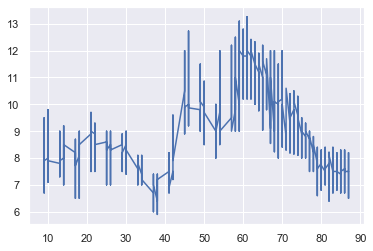

In [14]:
plt.plot(df['Two Years Ahead'].dropna().astype(float))

# plot forecasts in time

NameError: name 'df_gdp' is not defined

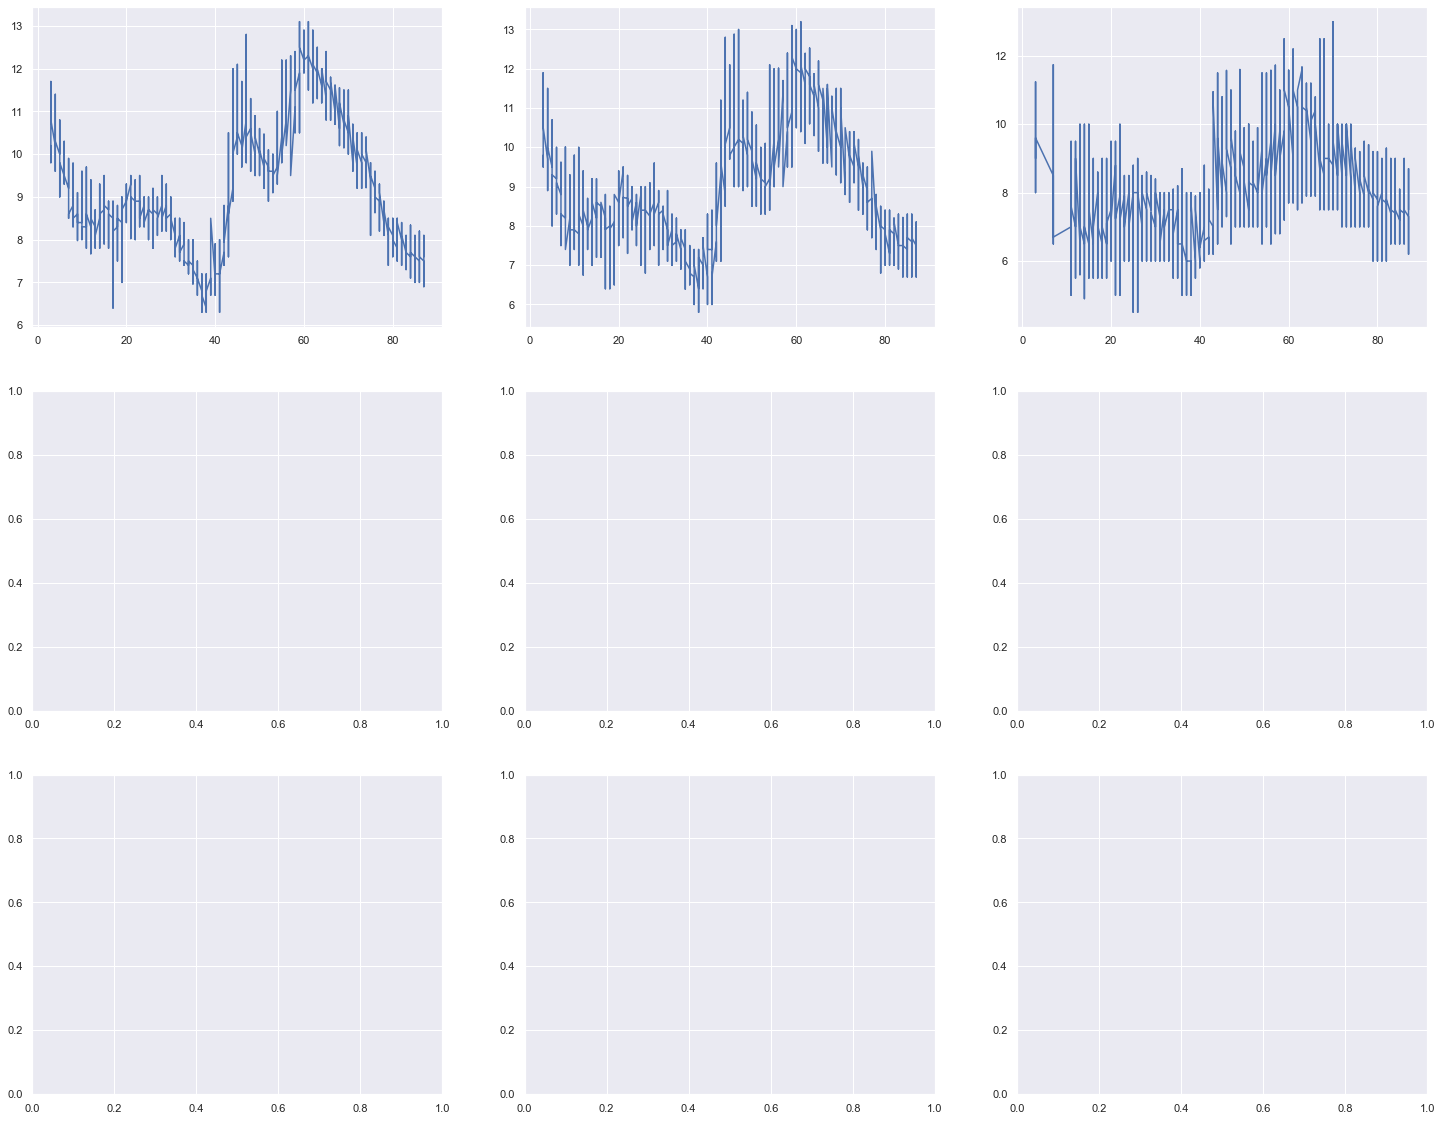

In [15]:
sns.set()
fig, axs = plt.subplots(3, 3, figsize=(25, 20))
axs[0,0].plot(df['Rolling1'].dropna().astype(float))
axs[0,1].plot(df['Rolling2'].dropna().astype(float))
axs[0,2].plot(df['Longer Term'].dropna().astype(float))
axs[1,0].plot(df_gdp['Rolling1'].dropna().astype(float))
axs[1,1].plot(df_gdp['Rolling2'].dropna().astype(float))
axs[1,2].plot(df_gdp['Longer Term'].dropna().astype(float))
axs[2,0].plot(df_un['Rolling1'].dropna().astype(float))
axs[2,1].plot(df_un['Rolling2'].dropna().astype(float))
axs[2,2].plot(df_un['Longer Term'].dropna().astype(float))

In [220]:
df_un = pd.read_pickle('undata.pkl')
df_gdp = pd.read_pickle('gdpdata.pkl')
df = pd.read_pickle('infldf.pkl')

In [221]:
df.index = df['SurveyDate']
df_gdp.index = df['SurveyDate']
df_un.index = df['SurveyDate']
#df.to_pickle('infldf.pkl')

# forecasts histograms

(array([ 11., 109., 685., 698., 801., 481., 203.,  68.,  16.,   5.]),
 array([ 4.5 ,  5.35,  6.2 ,  7.05,  7.9 ,  8.75,  9.6 , 10.45, 11.3 ,
        12.15, 13.  ]),
 <a list of 10 Patch objects>)

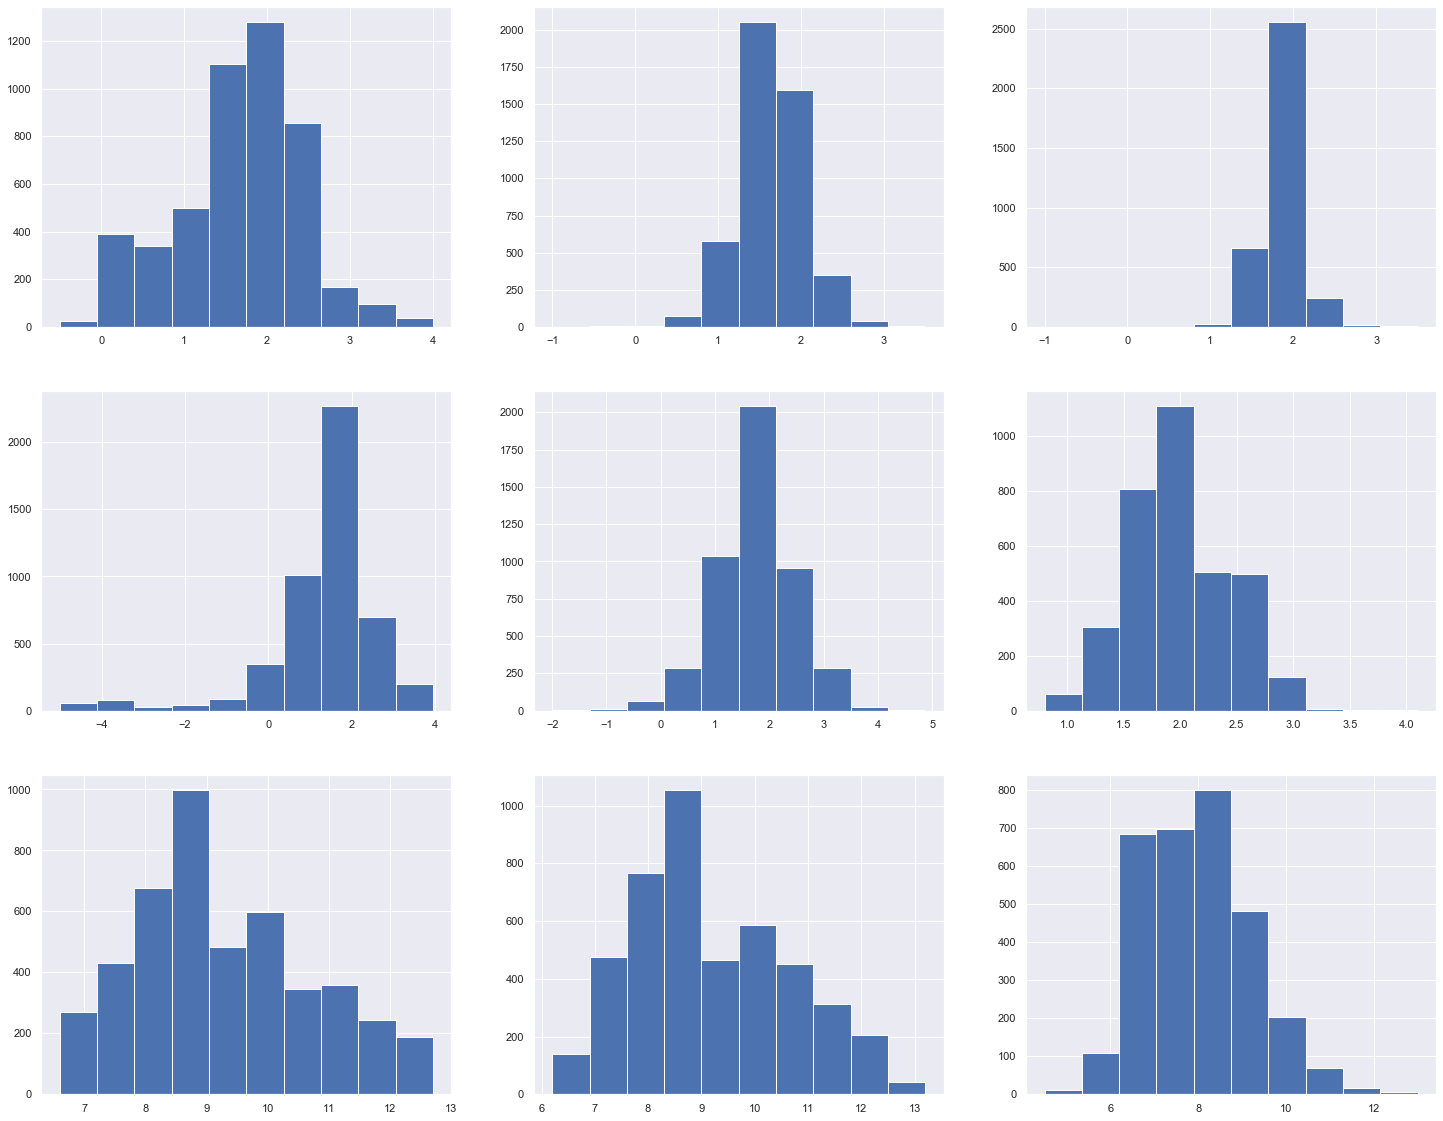

In [227]:
fig, axs = plt.subplots(3, 3, figsize=(25, 20))
axs[0,0].hist(df['Current Year'].dropna().astype(float))
axs[0,1].hist(df['One Year Ahead'].dropna().astype(float))
axs[0,2].hist(df['Longer Term'].dropna().astype(float))
axs[1,0].hist(df_gdp['Current Year'].dropna().astype(float))
axs[1,1].hist(df_gdp['One Year Ahead'].dropna().astype(float))
axs[1,2].hist(df_gdp['Longer Term'].dropna().astype(float))
axs[2,0].hist(df_un['Current Year'].dropna().astype(float))
axs[2,1].hist(df_un['One Year Ahead'].dropna().astype(float))
axs[2,2].hist(df_un['Longer Term'].dropna().astype(float))

In [228]:
df['Current Year'] = df['Current Year'].astype(float)
df['One Year Ahead'] = df['One Year Ahead'].astype(float)
df['Longer Term'] = df['Longer Term'].astype(float)

In [229]:
df['diff'] = df.groupby('Source')['Current Year'].diff().fillna(0)

ValueError: 

In [ ]:
df1 = df.sort_values(by=['Source', 'SurveyDate'])

In [ ]:
df1['CurrentYearDiff'] = df1['Current Year'].diff()
df1['OneYearDiff'] = df1['One Year Ahead'].diff()
df1['LongTermDiff'] = df1['Longer Term'].diff()

In [ ]:
df1 = df1.sort_values(by=['SurveyDate'])

In [230]:
df1 = df1.dropna()

NameError: name 'df1' is not defined

In [28]:
df1.index = df1['SurveyDate']

# One period differences

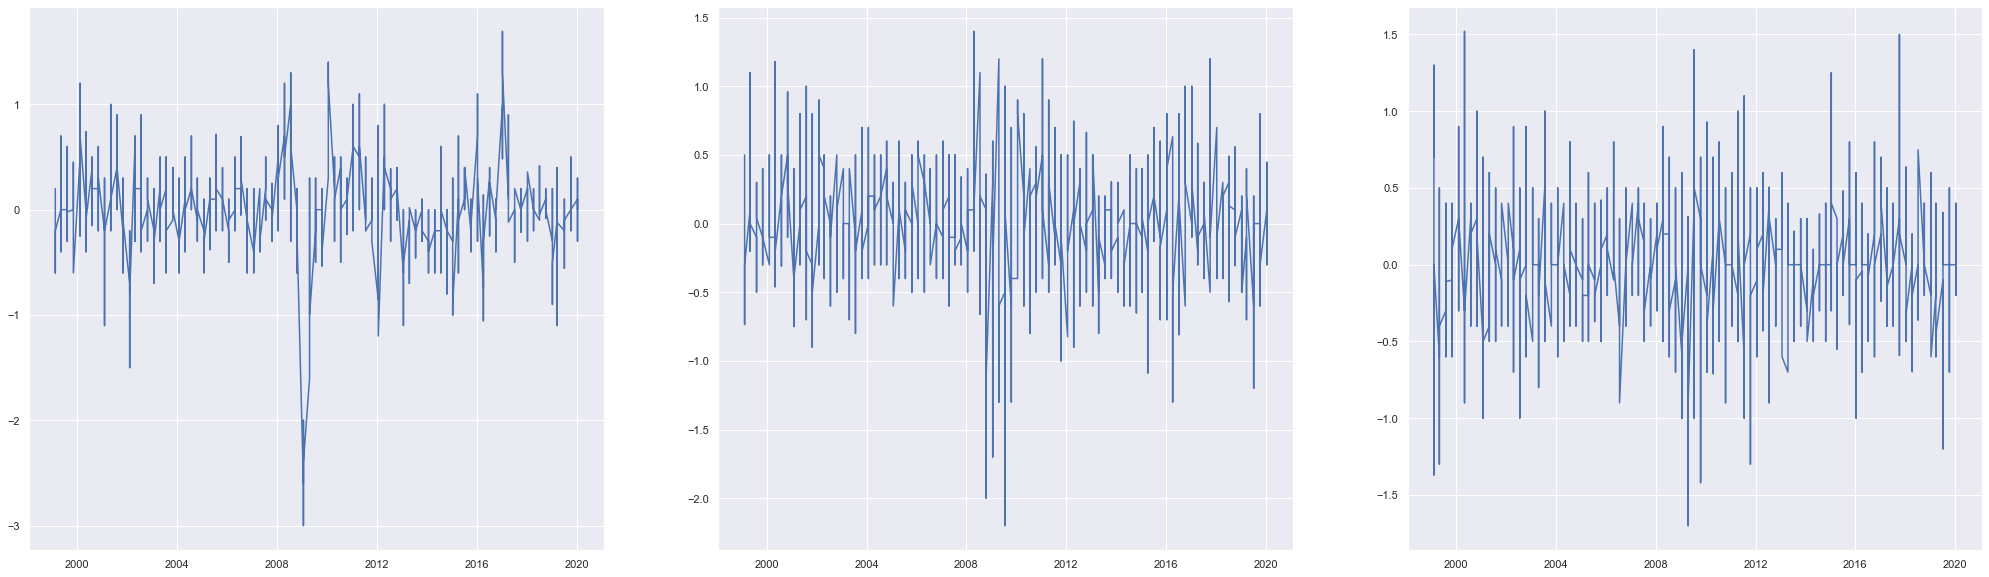

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(35, 10))
axs[0].plot(df1['CurrentYearDiff'].dropna().astype(float))
axs[1].plot(df1['OneYearDiff'].dropna().astype(float))
axs[2].plot(df1['LongTermDiff'].dropna().astype(float))
#axs[1,0].hist(df_gdp['Current Year'].dropna().astype(float))
#axs[1,1].hist(df_gdp['One Year Ahead'].dropna().astype(float))
#axs[1,2].hist(df_gdp['Longer Term'].dropna().astype(float))
#axs[2,0].hist(df_un['Current Year'].dropna().astype(float))
#axs[2,1].hist(df_un['One Year Ahead'].dropna().astype(float))
#axs[2,2].hist(df_un['Longer Term'].dropna().astype(float))

In [30]:
df1means = df1.groupby('SurveyDate')[['CurrentYearDiff','OneYearDiff', 'LongTermDiff']].mean()
df1means.index = df1['SurveyDate'].unique()

/Users/geri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'SurveyDate' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


# Means of differences

In [272]:
df1means

,CurrentYearDiff,OneYearDiff,LongTermDiff
1999-02-12,-2.325581e-03,-3.023256e-02,-0.023256
1999-05-03,3.870968e-03,-1.806452e-02,-0.018710
1999-08-06,2.896234e-17,1.521739e-02,-0.008696
1999-11-03,-2.076923e-02,4.153846e-02,0.038462
2000-02-09,-1.960000e-02,-1.360000e-01,-0.122400
2000-05-05,-2.000000e-02,1.933333e-02,0.005333
2000-08-04,9.916667e-02,6.125000e-02,0.042500
2000-11-02,4.883721e-03,-3.325581e-02,-0.044884
2001-02-01,-9.251859e-18,-8.333333e-03,-0.012083
2001-05-03,1.315789e-03,-5.000000e-02,-0.031579


In [231]:
plt.plot(df1means)

NameError: name 'df1means' is not defined